In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display, HTML
import pandas as pd
from meteostat import Point, Daily
from datetime import datetime
import time

# Load 1980-2020 - this is written in capstone_eda notebook
shapefile_path = "data/National_USFS_Fire_Occurrence_Point_FL/usfs_fire_occurrence_cleaned_1980_2020.shp"
gdf = gpd.read_file(shapefile_path)

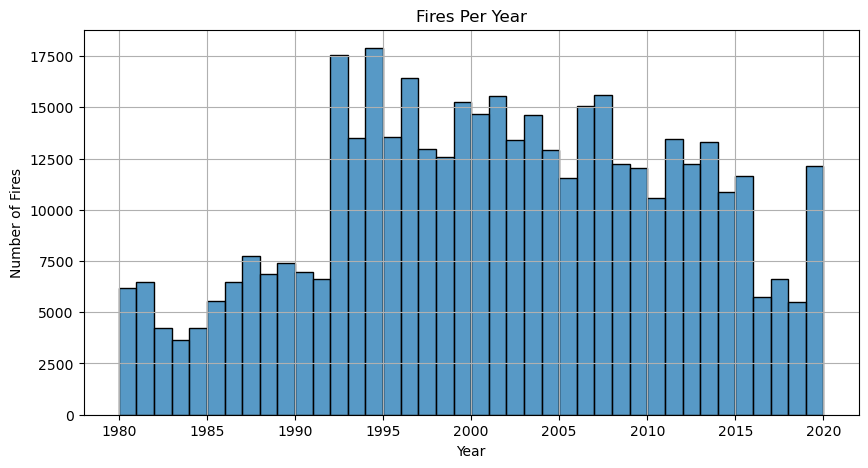

In [3]:
plt.figure(figsize=(10, 5))
sns.histplot(gdf['FIREYEAR'].dropna(), bins=40)
plt.title('Fires Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.grid(True)
plt.show()

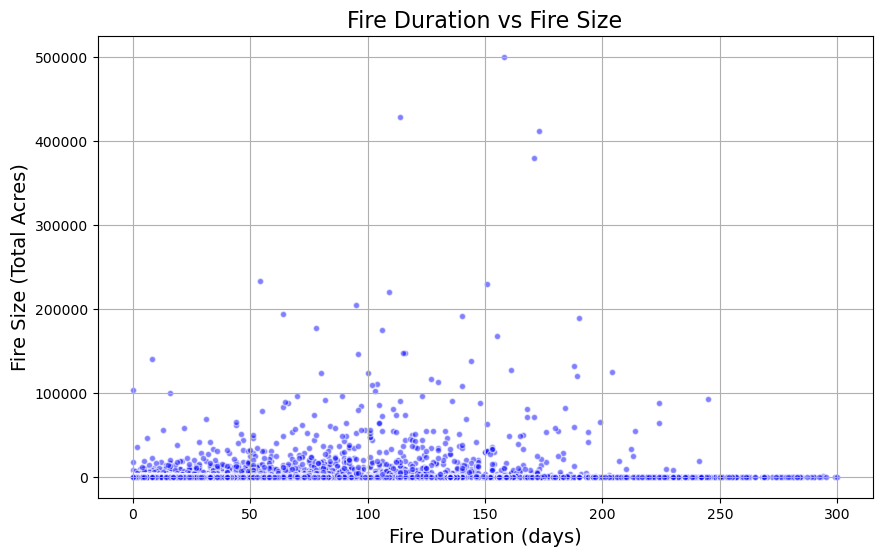

In [4]:
gdf['DISCOVERYD'] = pd.to_datetime(gdf['DISCOVERYD'], errors='coerce')
gdf['FIREOUTDAT'] = pd.to_datetime(gdf['FIREOUTDAT'], errors='coerce')
gdf['FIRE_DURATION'] = (gdf['FIREOUTDAT'] - gdf['DISCOVERYD']).dt.days
gdf = gdf[gdf['FIRE_DURATION'] >= 0]
gdf = gdf[gdf['FIRE_DURATION'] <= 300]
gdf = gdf[gdf['FIRE_DURATION'] >= 0]

plt.figure(figsize=(10, 6))
plt.scatter(gdf['FIRE_DURATION'], gdf['TOTALACRES'], alpha=0.5, c='blue', edgecolors='w', s=20)
plt.title('Fire Duration vs Fire Size', fontsize=16)
plt.xlabel('Fire Duration (days)', fontsize=14)
plt.ylabel('Fire Size (Total Acres)', fontsize=14)
plt.grid(True)
plt.show()



In [64]:
fire_data = gdf
fire_data['DISCOVERYD'] = pd.to_datetime(fire_data['DISCOVERYD'], errors='coerce')
fire_data['FIREOUTDAT'] = pd.to_datetime(fire_data['FIREOUTDAT'], errors='coerce')

# Step 2: Calculate fire duration (difference between DISCOVERYD and FIREOUTDAT)
fire_data['FIRE_DURATION'] = (fire_data['FIREOUTDAT'] - fire_data['DISCOVERYD']).dt.days

# Step 3: Remove records with invalid dates or negative durations (if any)
fire_data = fire_data[fire_data['FIRE_DURATION'] >= 0]

# Step 4: Find the fire record with the longest duration
longest_fire = fire_data.loc[fire_data['FIRE_DURATION'].idxmax()]

# Step 5: Display the fire with the longest duration
print("Fire with the longest duration:")
print(longest_fire)

# Optional: Display the specific details of the longest fire
print(f"Fire ID (OBJECTID): {longest_fire['OBJECTID']}")
print(f"Discovery Date: {longest_fire['DISCOVERYD']}")
print(f"Fire Out Date: {longest_fire['FIREOUTDAT']}")
print(f"Fire Duration: {longest_fire['FIRE_DURATION']} days")
print(f"Fire Size (Total Acres): {longest_fire['TOTALACRES']}")

Fire with the longest duration:
OBJECTID                                        313945223
GLOBALID           {7E67FB8E-4CE7-4499-9851-ABB0CA13AE23}
FIREOCCURI                                           None
CN                                                      0
REVDATE                                        2018/02/28
FIRENAME                                    Crescent Lake
COMPLEXNAM                                           None
FIREYEAR                                           1989.0
UNIQFIREID                                           None
SOFIRENUM                                            None
LOCALFIREN                                           None
SECURITYID                                           1004
DISCOVERYD                            1989-07-17 00:00:00
SIZECLASS                                               B
TOTALACRES                                            0.3
STATCAUSE                                            None
COMMENTS                                